# Analysis of Other Pages from qualitymeasures.ahrq.gov

In [1]:
with open("../scripts/archive-status-qualitymeasuresahrqgov-uris-from-crawl-noredirects-nofragments-cleaned-nosearch.tsv") as f:
    data = f.read()

In [2]:
identifiers = []
mementocounts = []
timemaps = []
totalcount = 0
notarchived = []
alldata = {}

for line in data.splitlines():
    line = line.strip()
    row = line.split('\t')
    
    if row[1] == 'ARCHIVED':
        identifier = row[0]
#         s2 = row[0].replace('https://www.guideline.gov/summaries/summary/', '')
#         identifier = int(s2[:s2.find('/')])
#         mementocount = int(row[2].replace("mementos", "").strip())
        timemap = eval(row[3])
        mementocount = len(timemap)
        
        if identifier[-1] == '/':
            identifier = identifier[:-1]
            
        if identifier not in identifiers:
       
            identifiers.append( identifier )
            mementocounts.append( mementocount )

            timemaps.append( timemap )

            alldata[identifier] = timemap
        
    elif row[1] == 'NOT ARCHIVED':
        notarchived.append(row[0])
        
    totalcount += 1

In [3]:
len(mementocounts)

90

In [4]:
len(timemaps)

90

In [5]:
totalcount

135

In [6]:
len(notarchived)

44

In [7]:
len(notarchived) / totalcount

0.32592592592592595

In [8]:
len(timemaps) / totalcount

0.6666666666666666

In [9]:
import matplotlib.pyplot as plt

In [10]:
max(mementocounts)

131

In [11]:
min(mementocounts)

2

counts: [36. 25. 11.  3.  6.  2.  2.  1.  0.  0.  1.  0.  1.  0.  0.  0.  0.  0.
  1.  0.  0.  0.  0.  0.  1.]
bars: [  2.     7.16  12.32  17.48  22.64  27.8   32.96  38.12  43.28  48.44
  53.6   58.76  63.92  69.08  74.24  79.4   84.56  89.72  94.88 100.04
 105.2  110.36 115.52 120.68 125.84 131.  ]
bins: <a list of 25 Patch objects>
max counts: 36.0
index of max counts: 0
bars[ind]: 2.0


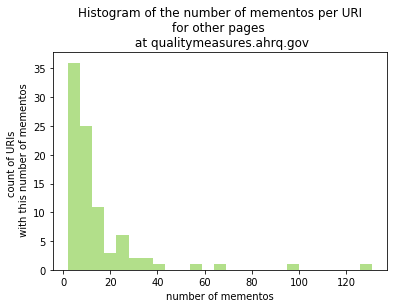

In [12]:
counts, bars, bins = plt.hist(mementocounts, bins=25, color="#b2df8a")
plt.xlabel("number of mementos")
plt.ylabel("count of URIs \n with this number of mementos")
plt.title("Histogram of the number of mementos per URI\nfor other pages \n at qualitymeasures.ahrq.gov")
print("counts: {}".format(counts))
print("bars: {}".format(bars))
print("bins: {}".format(bins))
print("max counts: {}".format(max(counts)))
ind = counts.tolist().index(max(counts))
print("index of max counts: {}".format(ind))
print("bars[ind]: {}".format(bars[ind]))

In [13]:
all_mdts = []

for timemap in timemaps:
    for memento in timemap:
        all_mdts.append(memento['datetime'])

In [14]:
len(all_mdts)

1346

In [15]:
min(all_mdts)

'2003-12-29T04:15:08Z'

In [16]:
max(all_mdts)

'2018-06-25T15:34:12Z'

In [17]:
from datetime import datetime

ids2mementos = []
mdt2ids = []
monthbuckets = {}

for identifier in alldata:
    timemap = alldata[identifier]
    
    for memento in timemap:
        
#         ids2mementos.append(identifier)
        
        mdt = datetime.strptime(memento['datetime'], '%Y-%m-%dT%H:%M:%SZ')
        
        mdt2ids.append(mdt)
        monthbuckets.setdefault( datetime.strptime(mdt.strftime('%Y-%m'), '%Y-%m'), 0)
        monthbuckets[ datetime.strptime(mdt.strftime('%Y-%m'), '%Y-%m') ] += 1

In [18]:
print("hi")

hi


In [19]:
x = []
y = []

for key in monthbuckets:
    x.append(key)
    y.append(monthbuckets[key])

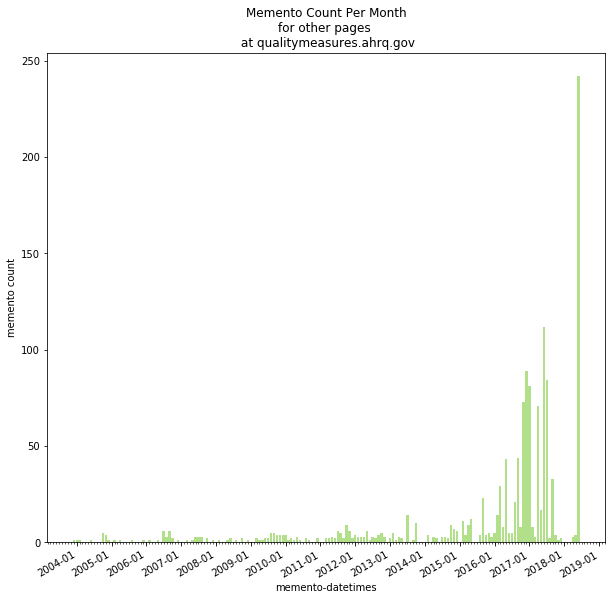

In [20]:
import matplotlib.dates as mdates

years = mdates.YearLocator()
months = mdates.MonthLocator()
yearsFmt = mdates.DateFormatter('%Y-%m')

fig, ax = plt.subplots()
fig.set_size_inches(10, 10)

ax.bar(x, y, width=25, color="#b2df8a")

ax.xaxis.set_major_locator(years)
ax.xaxis.set_major_formatter(yearsFmt)
ax.xaxis.set_minor_locator(months)

ax.set_xlabel("memento-datetimes")
ax.set_ylabel("memento count")
ax.set_title("Memento Count Per Month\nfor other pages \n at qualitymeasures.ahrq.gov")

fig.autofmt_xdate()

In [21]:
list(monthbuckets.keys())[0]

datetime.datetime(2004, 1, 1, 0, 0)

In [22]:
monthbuckets[list(monthbuckets.keys())[0]]

1

In [23]:
from urllib.parse import urlparse

archivedomains = {}

for timemap in timemaps:
    
    for memento in timemap:
        urim = memento['uri']
        archivedomain = urlparse(urim).netloc.split(':')[0]
        archivedomains.setdefault(archivedomain, 0)
        archivedomains[archivedomain] += 1

In [24]:
archivedomains

{'webarchive.loc.gov': 40,
 'wayback.archive-it.org': 145,
 'arquivo.pt': 12,
 'archive.is': 1,
 'web.archive.org': 1147,
 'perma-archives.org': 1}

In [25]:
total_mementos = 0

for ad in archivedomains:
    count = archivedomains[ad]
    total_mementos += count
    
total_mementos

1346

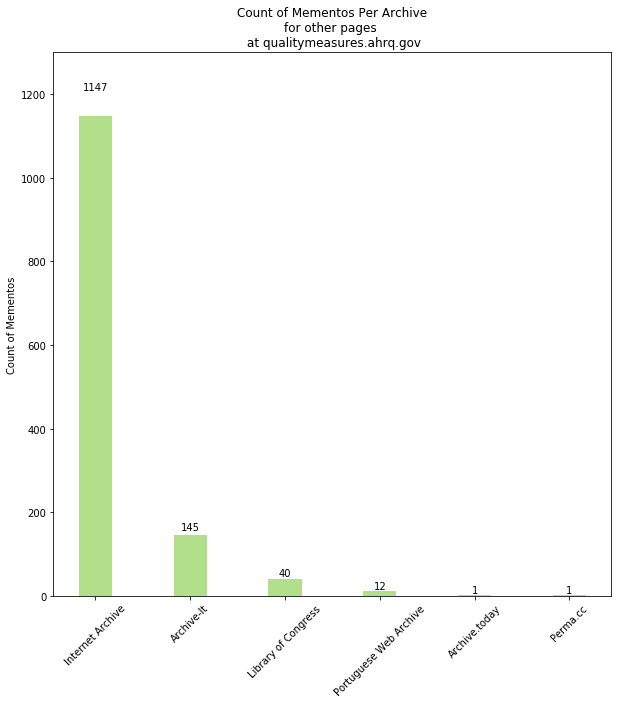

In [30]:
"""
========
Barchart
========

A bar plot with errorbars and height labels on individual bars
"""
import numpy as np
import matplotlib.pyplot as plt

N = 6
archivecounts = (1147, 145, 40, 12, 1, 1)
# men_std = (2, 3, 4, 1, 2)

ind = np.arange(N)  # the x locations for the groups
width = 0.35       # the width of the bars

fig, ax = plt.subplots()
fig.set_size_inches(10, 10)
rects1 = ax.bar(ind, archivecounts, width, align='center', color="#b2df8a")

# women_means = (25, 32, 34, 20, 25)
# women_std = (3, 5, 2, 3, 3)
# rects2 = ax.bar(ind + width, women_means, width, color='y', yerr=women_std)

# add some text for labels, title and axes ticks
ax.set_ylabel('Count of Mementos')
ax.set_title('Count of Mementos Per Archive\nfor other pages \n at qualitymeasures.ahrq.gov')
ax.set_xticks(ind)
ax.set_xticklabels(('Internet Archive', 'Archive-It', 'Library of Congress', 'Portuguese Web Archive', 'Archive.today', 'Perma.cc'))
ax.set_ylim(0, 1300)

# ax.legend((rects1[0], rects2[0]), ('Men', 'Women'))


def autolabel(rects):
    """
    Attach a text label above each bar displaying its height
    """
    for rect in rects:
        height = rect.get_height()
        ax.text(rect.get_x() + rect.get_width()/2., 1.05*height,
                '%d' % int(height),
                ha='center', va='bottom')

autolabel(rects1)
# autolabel(rects2)

for tick in ax.get_xticklabels():
    tick.set_rotation(45)

plt.show()